<a href="https://colab.research.google.com/github/hardik7887/TSF/blob/main/Task1_Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation
(GRIP) September 2021 Batch**

**Data Science & Business Analytics**

**Task1** Predict the percentage of an student based on the no. of study hours

Prediction using Supervised Machine Learning

Name: **Hardik Sumra** (Intern)

**Importing Libraries and Loading Data From CSV File**

In [ ]:
# Importing all libraries required in this notebook

import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization

In [ ]:
# Reading data from remote link

url = "http://bit.ly/w-data"
df = pd.read_csv(url)

print("Data import successful")
df.head(10)

Data import successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Input data Visualization**

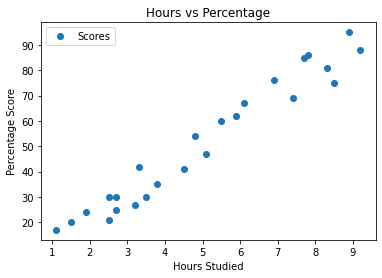

In [ ]:
# Plotting and Visualing the data

df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  

plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.show()

**Data Preprocessing**

In [ ]:
#preprocessing the data

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [ ]:
#splitting the dataset into training and testing.
#We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

In [ ]:
#We have split our data into training and testing sets, and now is finally the time to train our algorithm
#For this task, we are using simple Linear Regression model from scikit-learn library

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Testing the model**

In [ ]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


**Making Predictions**

In [ ]:
#Giving real time user input

y_pred=regressor.predict(X_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


**Comparing Actual and Predicted Values**

In [ ]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


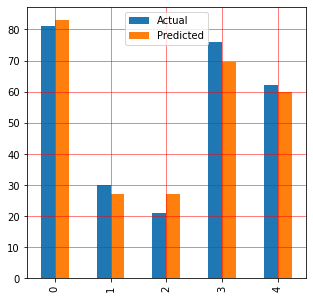

In [ ]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

**Visualization using Scatter Plot**

We make use of a scatter plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

<function matplotlib.pyplot.show>

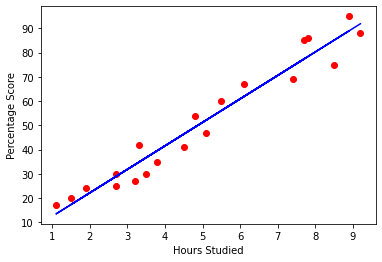

In [ ]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show

We repeat the same task for our testing dataset:

<function matplotlib.pyplot.show>

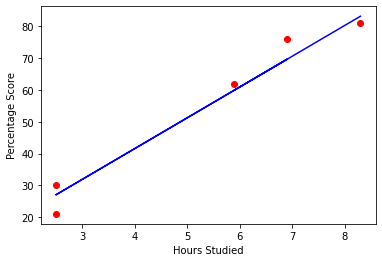

In [ ]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show

**Calculating score for 9.25 hours**

In [ ]:
hours =np.array(9.25)
hours=hours.reshape(1,-1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


So, the predicted score for 9.25 hours is 92.38611528261494

**Evaluating Model**

In [ ]:
from sklearn import metrics  
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R-2: 0.9678055545167994
